<a href="https://colab.research.google.com/github/MaricelaMH/Simulacion-1/blob/main/EJERCICIO6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

╒═════════════╤══════╤══════╤═════════╤═════════════╤════════════════╕
│ Clases      │   fo │   fe │   fo-fe │   (fo-fe)^2 │   (fo-fe)^2/fe │
╞═════════════╪══════╪══════╪═════════╪═════════════╪════════════════╡
│ (0.01-0.20) │   20 │   20 │       0 │           0 │           0    │
├─────────────┼──────┼──────┼─────────┼─────────────┼────────────────┤
│ (0.21-0.40) │   19 │   20 │      -1 │           1 │           0.05 │
├─────────────┼──────┼──────┼─────────┼─────────────┼────────────────┤
│ (0.41-0.60) │   21 │   20 │       1 │           1 │           0.05 │
├─────────────┼──────┼──────┼─────────┼─────────────┼────────────────┤
│ (0.61-0.80) │   22 │   20 │       2 │           4 │           0.2  │
├─────────────┼──────┼──────┼─────────┼─────────────┼────────────────┤
│ (0.81-1.00) │   18 │   20 │      -2 │           4 │           0.2  │
╘═════════════╧══════╧══════╧═════════╧═════════════╧════════════════╛


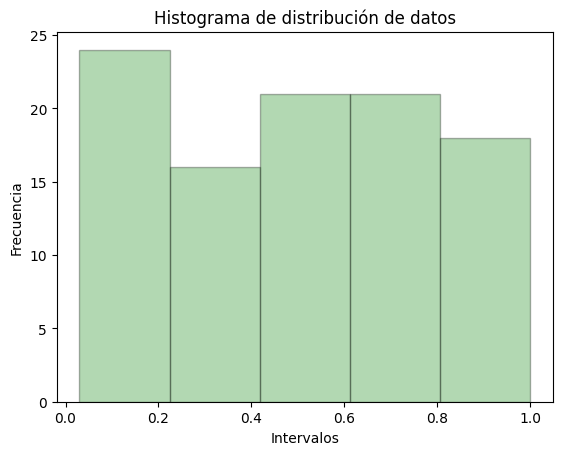

Valor del estadistico de prueba:  0.5
Valor crítico de chi-cuadrada: 7.8
*************************************************************************
* Aceptamos la hipotesis nula (Ho) dado que 0.5 <= 7.8 *
* Los datos pueden seguir una distribución uniforme *
Conclusión: No existe diferencia entre las proporciones de los datos.
*************************************************************************


In [49]:
# PROGRAMA QUE GENERA LOS NUMEROS ALEATORIOS
datos = [0.78, 0.98, 0.24, 0.73, 0.43, 0.16, 0.78, 0.47, 0.18, 0.55,
         0.04, 0.29, 0.68, 0.77, 0.16, 0.03, 0.79, 0.22, 0.37, 0.80,
         0.96, 0.26, 0.91, 0.55, 0.75, 0.55, 0.64, 0.39, 0.53, 0.45,
         0.61, 0.14, 0.38, 0.12, 0.40, 0.74, 0.78, 0.98, 0.27, 0.60,
         0.43, 0.67, 0.62, 0.32, 0.53, 0.54, 0.24, 0.29, 0.18, 0.08,
         0.82, 0.94, 0.19, 0.98, 0.41, 1.00, 0.74, 0.92, 0.14, 0.43,
         0.83, 0.88, 0.18, 0.21, 0.50, 0.13, 0.43, 0.69, 0.08, 0.12,
         0.22, 0.50, 0.16, 0.11, 0.18, 0.89, 0.80, 0.42, 0.29, 0.87,
         0.83, 0.79, 0.65, 0.28, 0.78, 0.49, 0.36, 0.86, 0.87, 0.64,
         0.51, 0.07, 0.18, 0.94, 0.50, 0.22, 0.66, 0.91, 0.48, 0.24]

clases = 5
f1 = 0
f2 = 0
f3 = 0
f4 = 0
f5 = 0
i = 0


for i in range(100):
    if 0.01 <= datos[i] <= 0.20:
        f1 = f1+ 1
    elif 0.21 <= datos[i] <= 0.40:
        f2 = f2 + 1
    elif 0.41 <= datos[i] <= 0.60:
        f3 = f3 + 1
    elif 0.61 <= datos[i] <= 0.80:
        f4 = f4 + 1
    elif 0.81 <= datos[i] <= 1:
        f5 = f5 + 1

#Calcualmos la frecuencia esperada fe
frec = [f1,f2,f3,f4,f5]
fe = len(datos)/clases
fes = [20,20, 20, 20, 20]
fofe = []
fofe_2 = []
fofe_2_fe = []
for i in range(5):
  fofe.insert(i,frec[i]-fe)
  fofe_2.insert(i,fofe[i]**2)
  fofe_2_fe.insert(i,fofe_2[i]/fe)

inter = ["(0.01-0.20)", "(0.21-0.40)", "(0.41-0.60)","(0.61-0.80)", "(0.81-1.00)"]

A = [[inter[i],frec[i],fes[i], fofe[i],fofe_2[i], fofe_2_fe[i]] for i in range(5)]
head = ["Clases","fo","fe","fo-fe", "(fo-fe)^2", "(fo-fe)^2/fe"]
A.insert(0,head)

from tabulate import tabulate
# Imprimir los datos en formato de tabla
print(tabulate(A, headers="firstrow", tablefmt="fancy_grid"))

# Histograma
import matplotlib.pyplot as plt

plt.hist(datos, bins=clases, color='green', edgecolor='black', alpha=0.3)
plt.title('Histograma de distribución de datos')
plt.xlabel('Intervalos')
plt.ylabel('Frecuencia')
plt.show()

# Sumar los elementos
suma=sum(fofe_2_fe[i] for i in range(5))
print("Valor del estadistico de prueba: ",suma)

from scipy.stats import chi2

# Grados de libertad
grados_libertad = clases - 1

# Nivel de confianza (90% / 100= 0.90)
nivel_confianza = 0.90

# Calcular el valor crítico de chi-cuadrada para el nivel de confianza dado
valc = chi2.ppf(nivel_confianza, grados_libertad)
valor_critico = round(valc, 1)
print("Valor crítico de chi-cuadrada:", valor_critico)


if suma <= valor_critico:
  text1="Aceptamos la hipotesis nula (Ho) dado que {} <= {}".format(suma,valor_critico)
  text2="Los datos pueden seguir una distribución uniforme"
  text3="Conclusión: No existe diferencia entre las proporciones de los datos."
  longitud_cuadro = max(len(text1), len(text2),len(text3)) + 4
  print("*" * longitud_cuadro)
  print(f"* {text1} *")
  print(f"* {text2} *")
  print(f"{text3}")
  print("*" * longitud_cuadro)
elif suma > valor_critico:
  text1="Rechazamos la hipotesis nula (Ho) dado que {} > {}".format(suma,valor_critico)
  text2="Los datos no siguen una distribución uniforme"
  text3="Conclusión: Existe diferencia entre las proporciones de los datos."
  longitud_cuadro = max(len(text1), len(text2),len(text3)) + 4
  print("*" * longitud_cuadro)
  print(f"* {text1} *")
  print(f"* {text2} *")
  print(f" {text3} ")
  print("*" * longitud_cuadro)




╒═══════════╤══════╤══════╤═════════╤═════════════╤════════════════╕
│ Clases    │   fo │   fe │   fo-fe │   (fo-fe)^2 │   (fo-fe)^2/fe │
╞═══════════╪══════╪══════╪═════════╪═════════════╪════════════════╡
│ (0-0.2)   │   52 │ 51.2 │     0.8 │        0.64 │     0.0125     │
├───────────┼──────┼──────┼─────────┼─────────────┼────────────────┤
│ (0.2-0.4) │   51 │ 51.2 │    -0.2 │        0.04 │     0.00078125 │
├───────────┼──────┼──────┼─────────┼─────────────┼────────────────┤
│ (0.4-0.6) │   51 │ 51.2 │    -0.2 │        0.04 │     0.00078125 │
├───────────┼──────┼──────┼─────────┼─────────────┼────────────────┤
│ (0.6-0.8) │   51 │ 51.2 │    -0.2 │        0.04 │     0.00078125 │
├───────────┼──────┼──────┼─────────┼─────────────┼────────────────┤
│ (0.8-1)   │   51 │ 51.2 │    -0.2 │        0.04 │     0.00078125 │
╘═══════════╧══════╧══════╧═════════╧═════════════╧════════════════╛


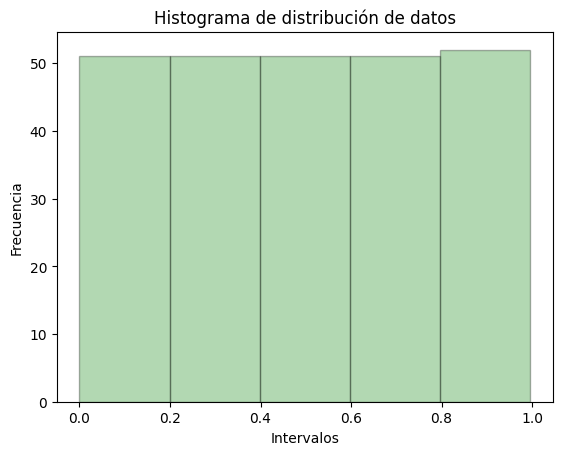

Valor del estadistico de prueba:  0.0156
Valor crítico de chi-cuadrada: 7.7794
*************************************************************************
* Aceptamos la hipotesis nula (Ho) dado que 0.0156 <= 7.7794 *
* Los datos pueden seguir una distribución uniforme *
Conclusión: No existe diferencia entre las proporciones de los datos.
*************************************************************************


In [51]:
iter = 500
X_n = 17
a = 121
c = 0
m = 256
resultados = []
imp = set()

# Aplicamos el metodo
for i in range(iter):
    val = (a * (1)) + X_n
    mod = (val) % m
    div = X_n / m

    if X_n not in imp:
        resultados.append((i, X_n, val, mod, div))
        imp.add(X_n)
        X_n = mod

# Crear lista para almacenar los valores de div
datos = []

# Agregar cada valor de div a la lista datos
for resultado in resultados:
    datos.append(resultado[4])

clases = 5
f1 = 0
f2 = 0
f3 = 0
f4 = 0
f5 = 0

for dato in datos:
    if 0 <= dato <= 0.2:
        f1 = f1 + 1
    elif 0.2 <= dato <= 0.4:
        f2 = f2 + 1
    elif 0.4 <= dato <= 0.6:
        f3 = f3 + 1
    elif 0.6 <= dato <= 0.8:
        f4 = f4 + 1
    elif 0.8 <= dato <= 1:
        f5 = f5 + 1

#METODO PRUEBA DE HIPOTESIS (CHI_CUADRADA)

#Calvualmos la frecuencia esperada fe
frec = [f1,f2,f3,f4,f5]
fe = len(datos)/clases
fes = [51.2,51.2, 51.2, 51.2, 51.2]
fofe = []
fofe_2 = []
fofe_2_fe = []
for i in range(5):
  fofe.insert(i,frec[i]-fe)
  fofe_2.insert(i,fofe[i]**2)
  fofe_2_fe.insert(i,fofe_2[i]/fe)

inter = ["(0-0.2)", "(0.2-0.4)", "(0.4-0.6)","(0.6-0.8)", "(0.8-1)"]

A = [[inter[i],frec[i],fes[i], fofe[i],fofe_2[i], fofe_2_fe[i]] for i in range(5)]
head = ["Clases","fo","fe","fo-fe", "(fo-fe)^2", "(fo-fe)^2/fe"]
A.insert(0,head)

from tabulate import tabulate
# Imprimir los datos en formato de tabla
print(tabulate(A, headers="firstrow", tablefmt="fancy_grid"))

# Histograma
import matplotlib.pyplot as plt

plt.hist(datos, bins=clases, color='green', edgecolor='black', alpha=0.3)
plt.title('Histograma de distribución de datos')
plt.xlabel('Intervalos')
plt.ylabel('Frecuencia')
plt.show()

# Sumar los elementos
suma=sum(fofe_2_fe[i] for i in range(5))
suma1=round(suma,4)
print("Valor del estadistico de prueba: ",suma1)

from scipy.stats import chi2

# Grados de libertad
grados_libertad = clases - 1

# Nivel de confianza (90% / 100= 0.90)
nivel_confianza = 0.90

# Calcular el valor crítico de chi-cuadrada para el nivel de confianza dado
valc = chi2.ppf(nivel_confianza, grados_libertad)
valor_critico = round(valc, 4)
print("Valor crítico de chi-cuadrada:", valor_critico)


if suma <= valor_critico:
  text1="Aceptamos la hipotesis nula (Ho) dado que {} <= {}".format(suma1,valor_critico)
  text2="Los datos pueden seguir una distribución uniforme"
  text3="Conclusión: No existe diferencia entre las proporciones de los datos."
  longitud_cuadro = max(len(text1), len(text2),len(text3)) + 4
  print("*" * longitud_cuadro)
  print(f"* {text1} *")
  print(f"* {text2} *")
  print(f"{text3}")
  print("*" * longitud_cuadro)
elif suma > valor_critico:
  text1="Rechazamos la hipotesis nula (Ho) dado que {} > {}".format(suma1,valor_critico)
  text2="Los datos no siguen una distribución uniforme"
  text3="Conclusión: Existe diferencia entre las proporciones de los datos."
  longitud_cuadro = max(len(text1), len(text2),len(text3)) + 4
  print("*" * longitud_cuadro)
  print(f"* {text1} *")
  print(f"* {text2} *")
  print(f" {text3} ")
  print("*" * longitud_cuadro)
